Project Title: EXPLORATORY DATA ANALYSIS (EDA), Data Cleaning and Preprocessing

Overview
This notebook focuses on cleaning and exploring the Iris dataset to better understand its structure and features.

Objective
The goal is to prepare the data and analyze it to identify patterns, relationships, and basic summary statistics among the numerical variables.

Approach
The dataset is loaded and cleaned to ensure accuracy and consistency. Exploratory Data Analysis (EDA) is then performed using simple statistics and visualizations.

Dataset: Iris Dataset
The Iris dataset contains measurement of Iris flowers across three species, each record includes four numeric measurement features: sepal lenth,sepal width, petal length and petal width along with a categorical species label.

1. Import Liabraries and Load Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv(r"C:\Users\user\Downloads\1) iris (1).csv")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df.shape

(150, 5)

In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. Checking for Missing Values

In [18]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing values were detected across all columns.

Therefore, no imputation or removal of missing data was required.

3. Identifying Duplicates

In [19]:
df.duplicated().sum()

np.int64(3)

Duplicate entries were identified in the dataset (common in Iris datasets depending on source).

4. Removing Duplicate Records

In [20]:
df = df.drop_duplicates()

Duplicate rows were removed to ensure data integrity and avoid bias in analysis.

5. Standardizing Categorical Variables

In [21]:
df["species"] = df["species"].str.lower().str.strip()

The species column was standardized to lowercase and stripped of extra spaces to ensure consistent labeling.
This helps avoid issues during grouping, visualization, and modeling.

6. Validation After Cleaning

In [22]:
df.shape
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

The final dataset contains (rows, columns) indicating the number of observations after cleaning.

i Verified again that there are no missing values in the cleaned datase

Conclusion
The dataset has been successfully cleaned and prepared. It contains no missing values, duplicate rows have been removed, and categorical data has been standardized for consistenc

Task 2: Exploratory Data Analysis (EDA)

Description:
Analyze the dataset to understand the data and discover important patterns and trends.

Objectives:

Find basic statistics such as mean, median, mode, and standard deviation.

Use charts like histograms, box plots, and scatter plots to show how the data is distributed.

Check how numerical features are related to each other using correlation.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv(r"C:\Users\user\Downloads\1) iris (1).csv")

 Mean, Median, Mode

Mean → The average value of a numeric column. Sensitive to outliers.

Median → The middle value when data is sorted. Robust to outliers.

Mode → The most frequently occurring value. Useful for categorical or discrete data.

In [4]:
mean = df.mean(numeric_only=True)
median = df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]
std = df.std(numeric_only=True)

In [5]:
Summary_stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Mode": mode,
    "Standard Deviation": std
})


Figure 1: The histograms show how the numerical values in the dataset are distributed. They help us understand how the data is spread, where most values are concentrated, and whether the data is skewed

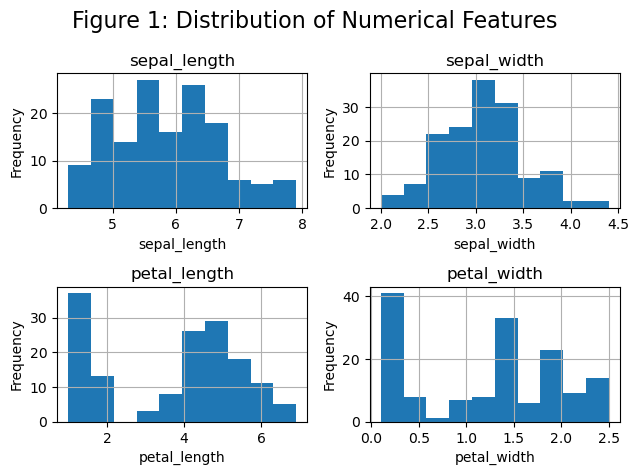

In [19]:
axes = df.hist()

for ax, col in zip(axes.flatten(), df.select_dtypes(include='number').columns):
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.suptitle("Figure 1: Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

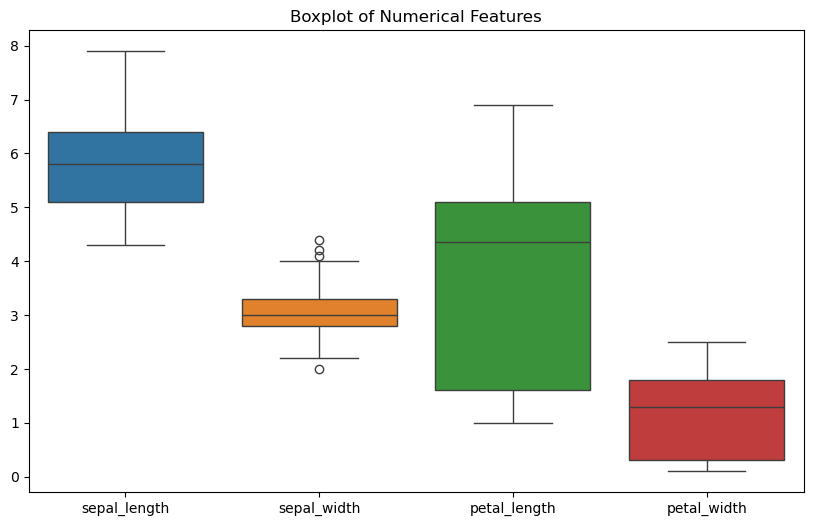

In [40]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df.select_dtypes(include='number'))

plt.title("Boxplot of Numerical Features")

plt.show()


Figure 2: Box Plot

A box plot shows the distribution of data: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. Outliers appear as points outside the whiskers. Great for detecting outliers and understanding spread and skewness.

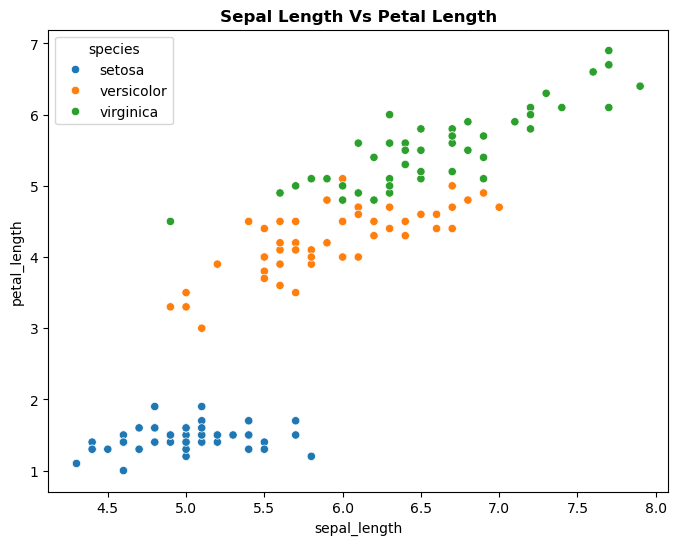

In [46]:

# Create figure
plt.figure(figsize=(8,6))

# Scatter plot
sns.scatterplot(
    x="sepal_length", 
    y="petal_length", 
    hue="species", 
    data=df
)

# Bold title
plt.title("Sepal Length Vs Petal Length", fontweight='bold')

# Show plot
plt.show()



Figure 3: Scatter Plot
A scatter plot shows the relationship between two numeric variables.

Points represent observations, and color/hue can differentiate categories.

Useful for seeing patterns, trends, or clusters.

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


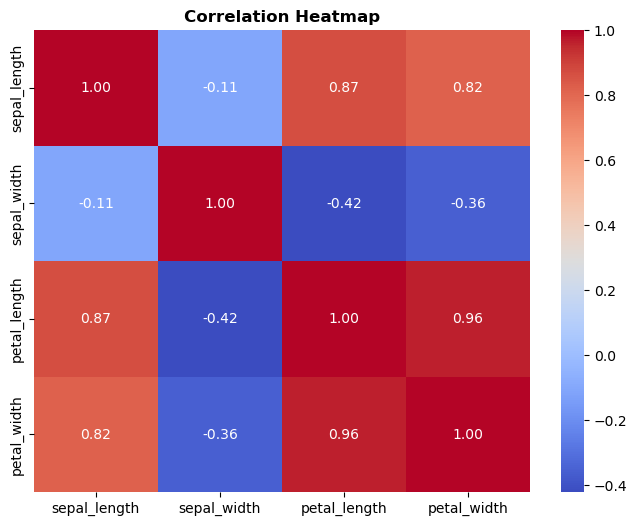

In [45]:


# Compute correlation matrix for numeric columns
correlation_matrix = df.select_dtypes(include='number').corr()
print(correlation_matrix)

# Create figure
plt.figure(figsize=(8,6))

# Heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,        # show values
    cmap="coolwarm",   # color map
    fmt=".2f"          # 2 decimal places
)

# Title
plt.title("Correlation Heatmap", fontweight='bold')

# Show plot
plt.show()


Figure 4: Correlation Analysis

Correlation measures how two numeric variables move together.

+1 → perfect positive correlation

-1 → perfect negative correlation

0 → no linear correlation

Helps identify relationships and potential multicollinearity.

Conclusion: The dataset was cleaned and prepared by handling inconsistencies and removing duplicates to ensure data quality. Summary statistics and visualizations such as boxplots and scatter plots were used to explore distributions, detect outliers, and understand relationships between variables. Overall, the analysis provided a clear and reliable foundation for meaningful insights and further analysis

In [21]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# File path for PDF
pdf_path = "eda_project_with_cover.pdf"

with PdfPages(pdf_path) as pdf:

    # ---------- Cover Page ----------
    plt.figure(figsize=(8, 6))
    plt.axis('off')  # Hide axes

    # Title
    plt.text(0.5, 0.7, "Exploratory Data Analysis (EDA) Project", 
             fontsize=24, ha='center', weight='bold')

    # Subtitle / Dataset
    plt.text(0.5, 0.6, "Iris Dataset", fontsize=18, ha='center')

    # Author Name
    plt.text(0.5, 0.45, "Author: Afuye Christianah Abolanle", 
             fontsize=16, ha='center')

    # Submission Date
    plt.text(0.5, 0.35, "Date Submitted: 31 January 2026", 
             fontsize=14, ha='center')

    pdf.savefig()  # Save cover page
    plt.close()

    # ---------- Example Figure ----------
    # You can continue with your histograms, boxplots, scatter plots, etc.
    plt.figure(figsize=(8,6))
    plt.plot([1,2,3],[4,5,6])
    plt.title("Sample Figure")
    pdf.savefig()
    plt.close()

print(f"PDF saved with cover page at: {pdf_path}")


PDF saved with cover page at: eda_project_with_cover.pdf


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.datasets import load_iris
import pandas as pd
import os

# =======================
# Load Iris dataset
# =======================
iris = load_iris(as_frame=True)
df = iris.frame

# Rename columns for easier use
df = df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width',
    'target': 'species'
})

# Convert numeric target to categorical species names
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# =======================
# PDF filename setup
# =======================
submission_date = "02-02-2026"
base_filename = f"Iris_EDA_Visualizations_{submission_date}.pdf"
pdf_filename = base_filename
counter = 1
while os.path.exists(pdf_filename):
    pdf_filename = f"Iris_EDA_Visualizations_{submission_date}_{counter}.pdf"
    counter += 1

# =======================
# Create PDF
# =======================
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

with PdfPages(pdf_filename) as pdf:

    # -----------------------
    # COVER PAGE
    # -----------------------
    plt.figure(figsize=(11, 8.5))
    plt.axis("off")
    plt.text(0.5, 0.7,
             "Exploratory Data Analysis (EDA)\nIris Dataset",
             ha="center", va="center",
             fontsize=22, fontweight="bold")
    plt.text(0.5, 0.55,
             "Submitted by: Afuye Christianah Abolanle\n\nTools: Python, Pandas, Matplotlib, Seaborn",
             ha="center", va="center",
             fontsize=14)
    plt.text(0.5, 0.4,
             f"Date: {submission_date}",
             ha="center", va="center",
             fontsize=12)
    pdf.savefig()
    plt.close()

    # -----------------------
    # FIGURE 1: HISTOGRAMS
    # -----------------------
    axes = df[numeric_cols].hist(figsize=(10, 6))
    for ax, col in zip(axes.flatten(), numeric_cols):
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
    plt.suptitle("Figure 1: Distribution of Numerical Features", fontsize=16)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # -----------------------
    # FIGURE 2: BOXPLOT (Same size as others, fully visible x-axis)
    # -----------------------
    plt.figure(figsize=(10, 6))  # Same size as histograms
    sns.boxplot(data=df[numeric_cols])
    plt.xticks(rotation=0, ha='center')  # Keep labels horizontal and readable
    plt.xlabel("Numerical Features")
    plt.ylabel("Values")
    plt.title("Figure 2: Boxplot of Numerical Features")
    plt.tight_layout()  # Prevent clipping of x-axis labels
    pdf.savefig()
    plt.close()

    # -----------------------
    # FIGURE 3: SCATTER PLOT
    # -----------------------
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="sepal_length", y="petal_length", hue="species", data=df)
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.title("Figure 3: Sepal Length vs Petal Length")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # -----------------------
    # FIGURE 4: CORRELATION HEATMAP
    # -----------------------
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Figure 4: Correlation Matrix of Numerical Features")
    plt.tight_layout()
    pdf.savefig()
    plt.close()

print(f"PDF successfully created: {pdf_filename}")


PDF successfully created: Iris_EDA_Visualizations_02-02-2026_1.pdf
